<h2>S&P 500  Monthly Seasonality</h2>

<h5>This project aims to analyze the monthly seasonality of the S&P 500 index, one of the main benchmarks of global equity markets. 

<h5>Seasonality analysis helps identify how average returns vary depending on the month, highlighting potential historical patterns. </h5>

<h5>The project downloads historical index data, calculates monthly returns, and visualizes them through charts and descriptive statistics, providing a useful tool to understand possible cyclical market behaviors.</h5>

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

In [79]:
# Define Period of time of the analysis
start = "1985-01-01"
end = "2025-01-01"

In [80]:
# Define the Ticker: ^GSPC represents the S&P 500 in yahoo finance
Ticker = ["^GSPC"]

In [81]:
# Download the Adjusted Close Price for the Ticker
data = yf.download(Ticker, start, end, interval="1mo")["Close"]
data.head()

/var/folders/jz/tvr_18jd0lj1kyd1flnm92p00000gn/T/ipykernel_46310/1080654017.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(Ticker, start, end, interval="1mo")["Close"]
[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC
Date,
1985-01-01,179.630005
1985-02-01,181.179993
1985-03-01,180.660004
1985-04-01,179.830002
1985-05-01,189.550003


In [82]:
# Monthly return 
m_return = ((data/data.shift(1)) - 1).dropna()
m_return = m_return.rename(columns= {"^GSPC" : "Monthly Return S&P 500"})

In [83]:
m_return["Month"] = m_return.index.month      
m_return["Year"]  = m_return.index.year

print(m_return)

Ticker      Monthly Return S&P 500  Month  Year
Date                                           
1985-02-01                0.008629      2  1985
1985-03-01               -0.002870      3  1985
1985-04-01               -0.004594      4  1985
1985-05-01                0.054051      5  1985
1985-06-01                0.012134      6  1985
...                            ...    ...   ...
2024-08-01                0.022835      8  2024
2024-09-01                0.020197      9  2024
2024-10-01               -0.009897     10  2024
2024-11-01                0.057301     11  2024
2024-12-01               -0.024990     12  2024

[479 rows x 3 columns]


In [89]:
# Average Return by month 
avg_by_month = m_return.groupby("Month")["Monthly Return S&P 500"].mean().reindex(range(1, 13))

# Overall Average return 
overall_avg  = m_return["Monthly Return S&P 500"].mean()

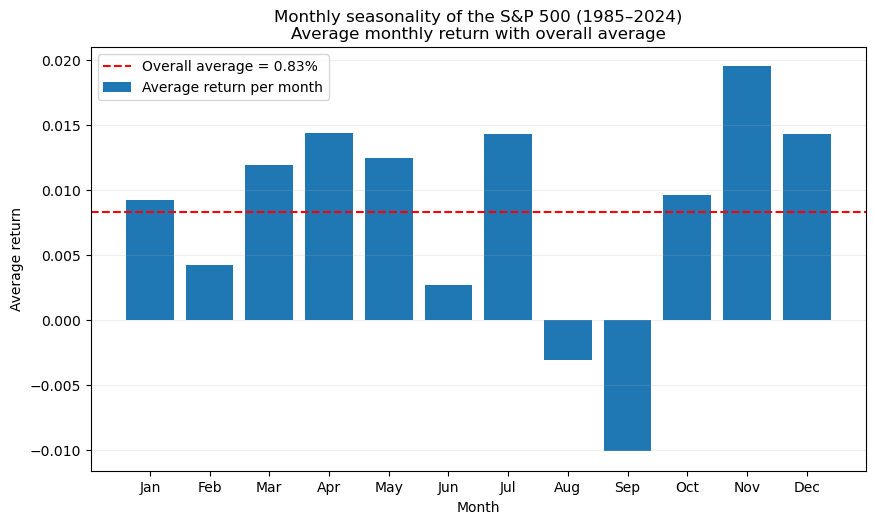

In [87]:
# Graph 
months_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# Plot Average monthly return 
plt.figure(figsize=(10,5.5))
plt.bar(months_labels, avg_by_month.values, label = "Average return per month")

# Plot Overall Average return 
plt.axhline(overall_avg, ls="--", color="red", lw=1.5,
            label=f"Overall average = {overall_avg*100:.2f}%")

plt.title(f"Monthly seasonality of the S&P 500 "
          f"({m_return['Year'].min()}–{m_return['Year'].max()})\n"
          "Average monthly return with overall average")

plt.xlabel("Month")
plt.ylabel("Average return")

plt.grid(axis="y", alpha=0.2)
plt.legend(loc="upper left")

plt.show()